# Chapter 2

## page 40

In [26]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom

In [27]:
az.style.use("arviz-darkgrid")

In [28]:
npoints = 20

In [29]:
def m2(k, n, npoints=20, prior=np.ones(npoints)):
    fig, ax = plt.subplots(1, 1)
    p_grid = np.linspace(0, 1, npoints)
    likelihood = binom.pmf(k, n, p_grid)
    unstd_posterior = likelihood * prior
    posterior = unstd_posterior / np.sum(unstd_posterior)
    ax.plot(p_grid, posterior, linestyle="solid", marker="o", fillstyle="none")

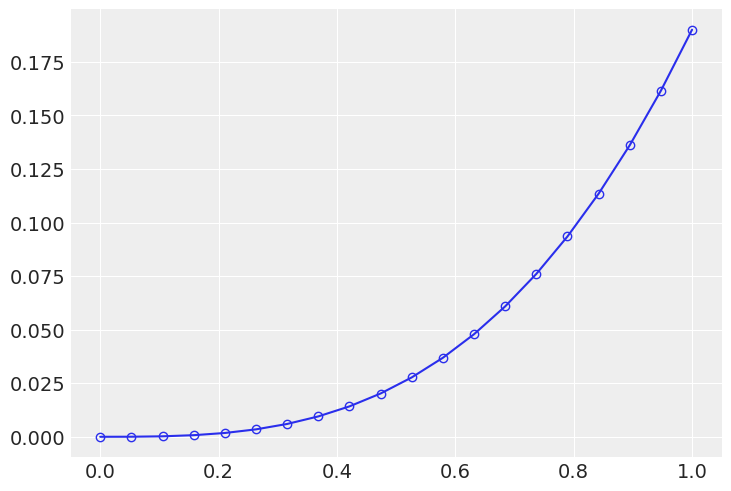

In [30]:
m2(3, 3)

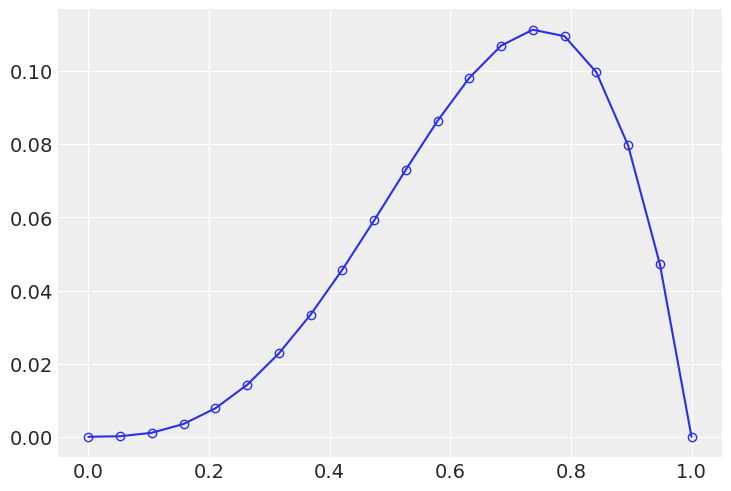

In [31]:
m2(3, 4)

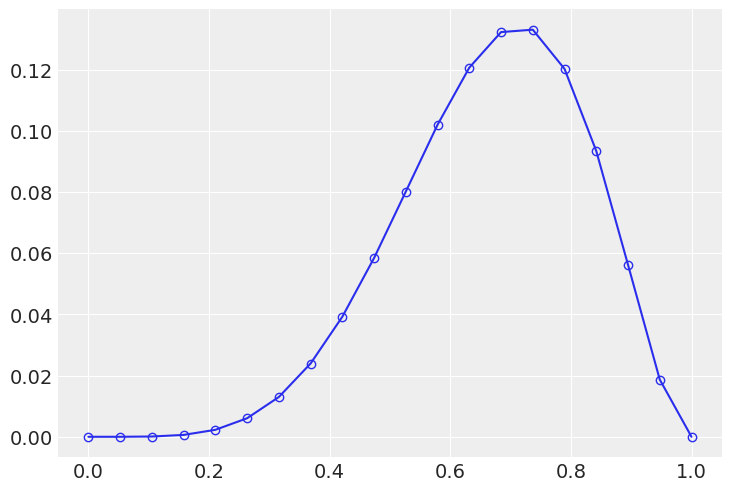

In [32]:
m2(5, 7)

In [33]:
p_grid = np.linspace(0, 1, npoints)
prior = np.where(p_grid < 0.5, 0, 1)

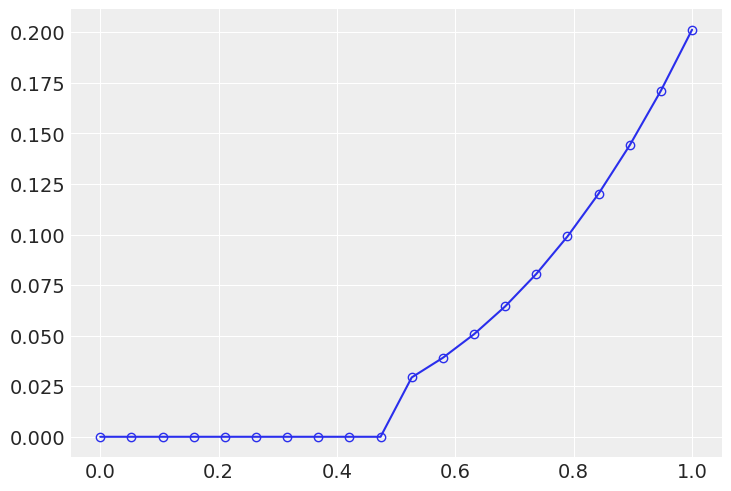

In [34]:
m2(3, 3, prior=prior)

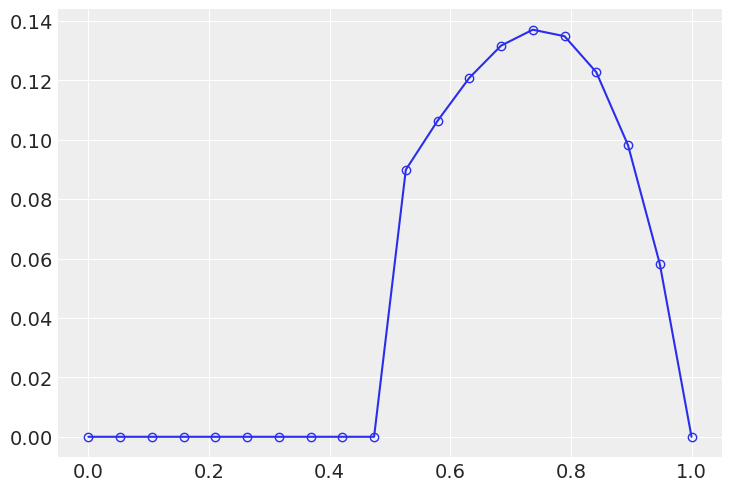

In [35]:
m2(3, 4, prior=prior)

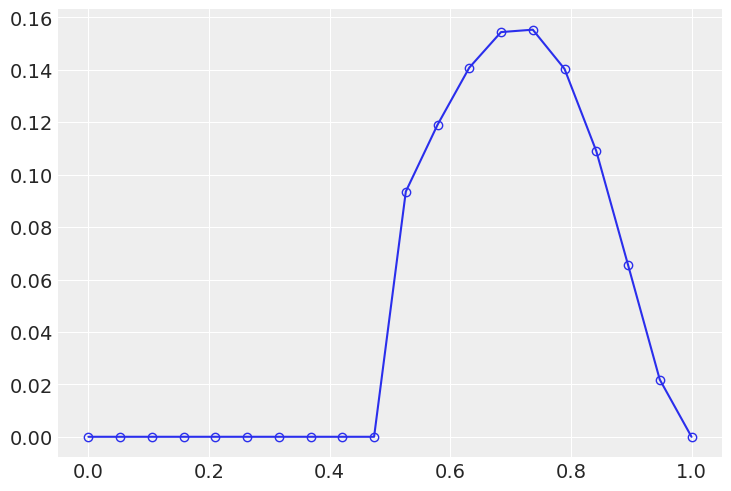

In [36]:
m2(5, 7, prior=prior)

In [37]:
npoints = 1000

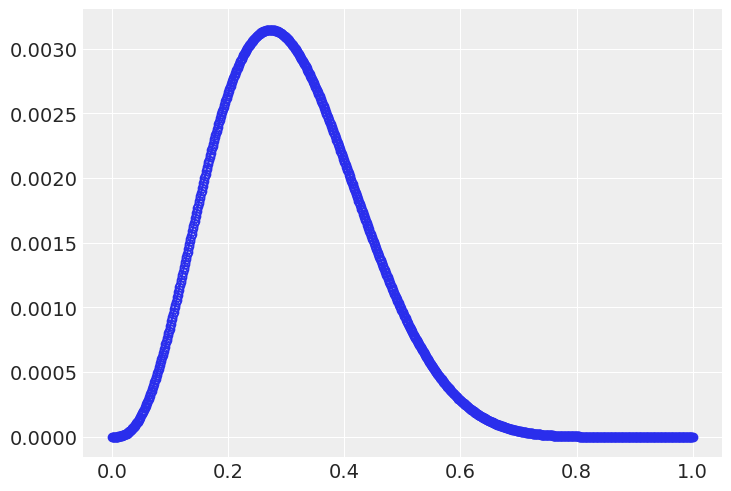

In [38]:
fig, ax = plt.subplots(1, 1)
p_grid = np.linspace(0, 1, npoints)
prior = np.ones(npoints)
likelihood = binom.pmf(3, 11, p_grid)
unstd_posterior = likelihood * prior
posterior = unstd_posterior / np.sum(unstd_posterior)
ax.plot(p_grid, posterior, linestyle="solid", marker="o", fillstyle="none")

In [39]:
samples = np.random.choice(p_grid, 10000, replace=True, p=posterior)
samples

array([0.3033033 , 0.51051051, 0.12612613, ..., 0.15115115, 0.21221221,
       0.38238238])

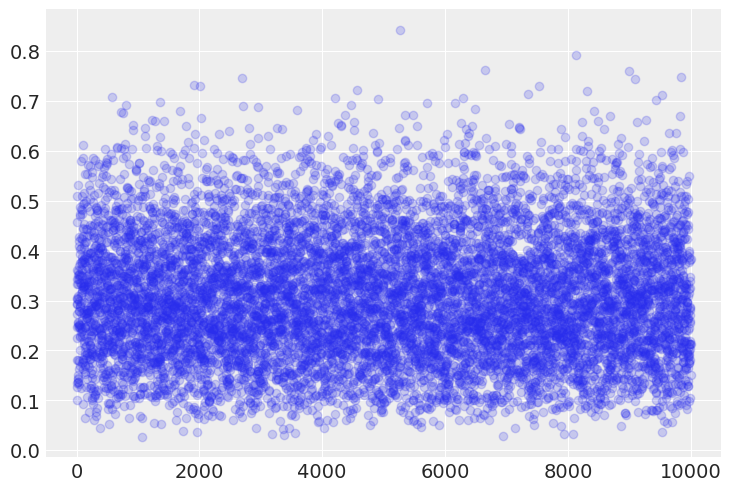

In [40]:
plt.scatter(np.arange(10000), samples, alpha=0.2)

In [41]:
w_sim = binom.rvs(5, p=samples, size=10000)

In [42]:
w_sim

array([0, 3, 1, ..., 1, 2, 2])

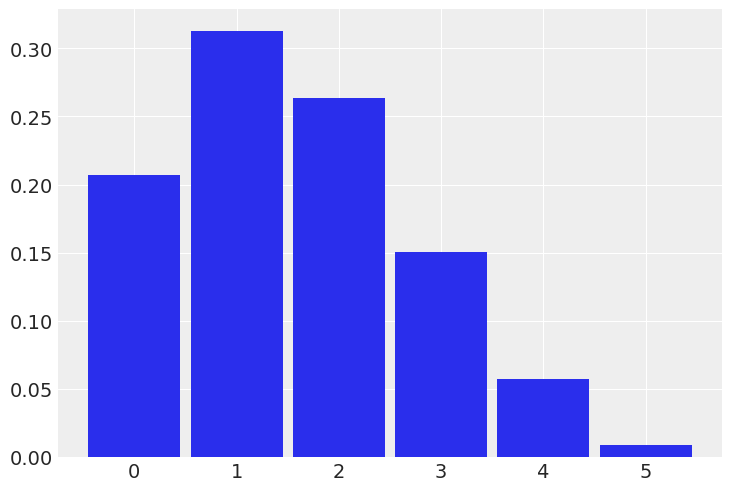

In [43]:
az.plot_dist(w_sim)

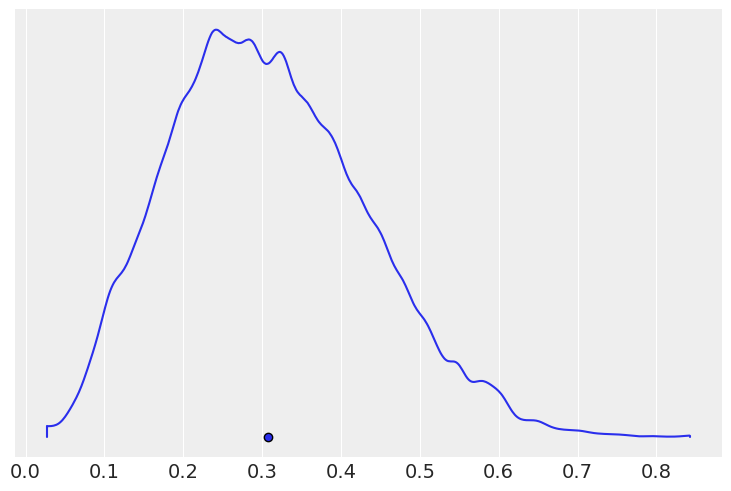

In [44]:
az.plot_density({"": samples}, hdi_prob=1)
plt.show()